# Predicting Bike Rentals

## AIM:

In this project, the aim is to predict the total number of bikes people rented in a given hour.
The target feature is `cnt`, i.e. total number of bike rentals (casual and registered).

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

Hadi Fanaee-T at the University of Porto compiled this data into a CSV file, in which each row represents the number of bike rentals for a single hour of a single day. 

The descriptions for the columns in the dataframe are:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)
                                      
                                      
To accomplish this,  will create a few different machine learning models and evaluate their performance.

## Studying the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [146]:
# Reading in the data

bike_rentals= pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [9]:
# Printing out the dataframe size
print('Total number of rows are:', bike_rentals.shape[0])

Total number of rows are: 17379


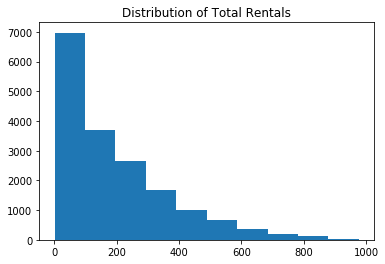

In [17]:
plt.hist(bike_rentals.cnt);
plt.title('Distribution of Total Rentals');

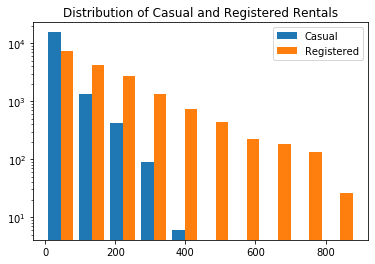

In [40]:
plt.hist(x=(bike_rentals.casual, bike_rentals.registered), log=True, label=['Casual', 'Registered'])
plt.legend()
plt.title('Distribution of Casual and Registered Rentals');

The total number of pre-registered rentals are much greater than casual. The tapering end seen in the total count histogram is enlarged using a log scale.

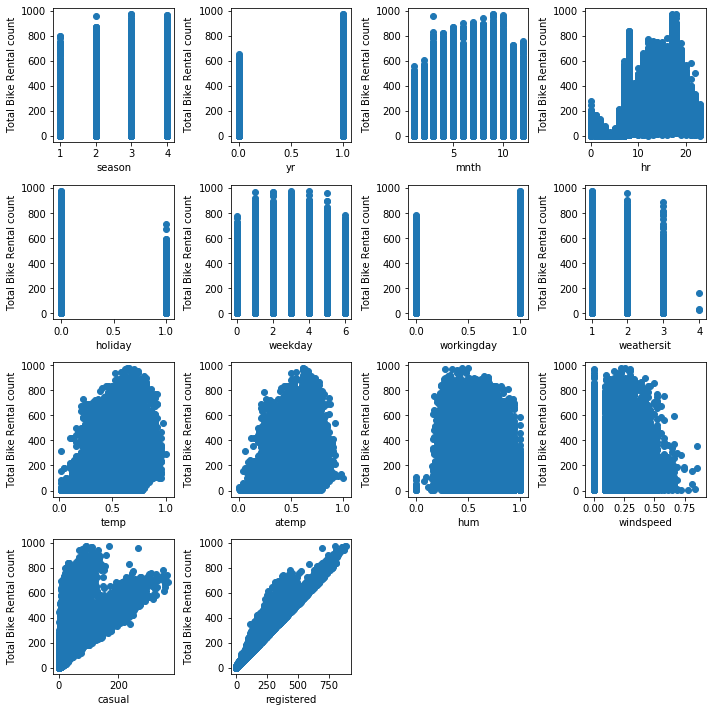

In [188]:
column= bike_rentals.columns.drop(['cnt', 'instant', 'dteday'])
fig=plt.figure(figsize=(10,10))

for i in range(len(column)):
    ax=fig.add_subplot(4,4,i+1)
    ax.scatter( bike_rentals[column[i]], bike_rentals.cnt)
    ax.set_ylabel('Total Bike Rental count')
    ax.set_xlabel(column[i])
    
fig.tight_layout()

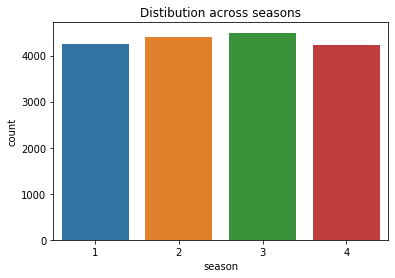

In [189]:
sns.countplot(bike_rentals.season);
plt.title('Distibution across seasons');

In [145]:
bike_rentals.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


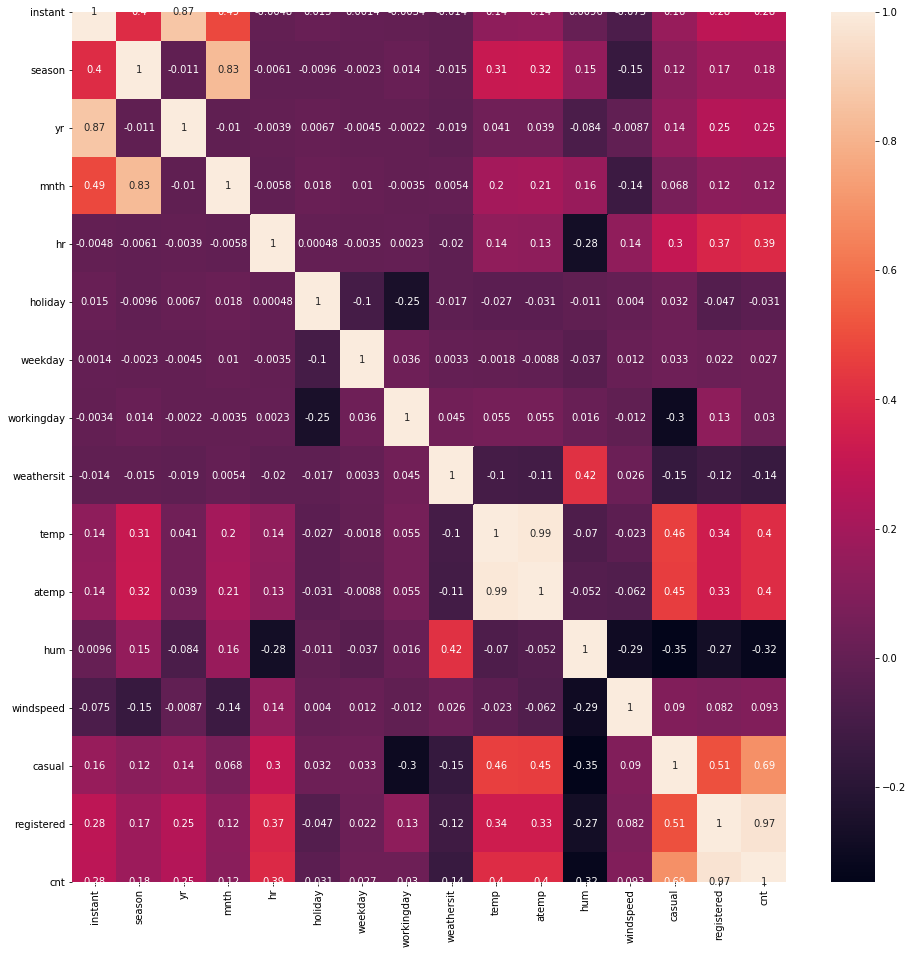

In [27]:
plt.figure(figsize=(16,16))
sns.heatmap(bike_rentals.corr(), annot=True)

In [42]:
# Studying the correlation of each feature with Total Count column
bike_rentals.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

`Casual` and `Registered`, even though show a strong correlation, are used to find the total count of rentals i.e. our target feature, so we will ignore it from further analysis.  

`Humidity` has a strong negative correlation with the total count, which is valid. No one wants to cycle on a humid day. 

`Holiday` also is negatively correlated, which may indicate that bike rental services are used more for daily commue (see positive realtion with working day) rather than for an excursion. 

## Adding Features

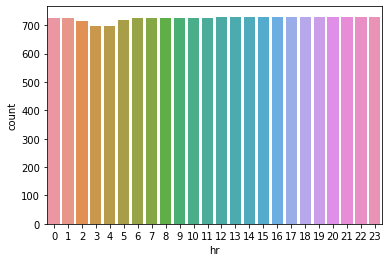

In [50]:
sns.countplot(bike_rentals.hr, order=range(0,24));

Apart from a small dip at 3 and 4 am, the distribution is almost the same. 

A machine learning model would treat each hour as unique, but we can segregate them as morning, afternon, evening and night.


For example, the hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. We will introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

Extracting features from our existing dataset can help enrich the model.

In [52]:
def assign_labels(hr):
    if hr in range(6,12):         # Morning slot
        return 1
    elif hr in range (12, 18):    # Afternoon slot
        return 2 
    elif hr in range (18, 24):    # Evening slot
        return 3
    else:                         # Night slot
        return 4

In [53]:
bike_rentals['time_label']= bike_rentals.hr.apply(assign_labels)

In [55]:
bike_rentals['time_label'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

## APPLYING MACHINE LEARNING ALGORITHMS

Before we can start, we split the dataset into train and test data.

First, we need to ignore the casual and registered columns because cnt is derived from them. Since we are trying to predict the number of people who rent bikes in a given hour (cnt), it doesn't make sense that we already know casual or registered rentals, because those numbers are added together to get cnt. This is considered as data leakage.

In [59]:
from sklearn.model_selection import train_test_split
X= bike_rentals.drop(columns=['cnt', 'casual', 'registered'])
y= bike_rentals.cnt

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [125]:
predictors= X_train.columns.drop(['dteday', 'instant'])

### CASE 1: LINEAR REGRESSION

Let's start off with Linear Regression. Linear regression will probably work fairly well on this data, given that many of the columns are highly correlated with cnt.

Linear regression works best when predictors are linearly correlated to the target and also independent -- in other words, they don't change meaning when we combine them with each other. 

The good thing about linear regression is that it's fairly resistant to overfitting because it's straightforward. It also can be prone to underfitting the data, however, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.


In [79]:
X_train[predictors]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,time_label
335,336,1,0,1,0,6,0,1,0.20,0.55,0.2239,1
7035,7036,4,0,10,0,2,1,1,0.52,0.42,0.1045,3
8051,8052,4,0,12,0,3,1,3,0.46,1.00,0.2239,4
2133,2134,2,0,4,0,0,0,2,0.46,0.31,0.0000,3
8485,8486,1,0,12,0,0,0,1,0.20,0.75,0.1045,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11285,2,1,4,0,5,1,1,0.46,0.88,0.0896,1
11964,11965,2,1,5,0,5,1,1,0.66,0.34,0.1343,2
5390,5391,3,0,8,0,3,1,1,0.80,0.43,0.2836,2
860,861,1,0,2,0,2,1,1,0.24,0.65,0.4179,1


In [194]:
lin_model=LinearRegression()
lin_model.fit(X_train[predictors], y_train)
y_pred= lin_model.predict(X_test[predictors])
lin_acc=round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
print('RMSE Accuracy with Linear Regression is:',lin_acc)

RMSE Accuracy with Linear Regression is: 130.88


### CASE 2: DECISION TREES

Decision trees tend to predict outcomes much more reliably than linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. 

Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [195]:
model= DecisionTreeRegressor()
model.fit(X_train[predictors], y_train)
y_pred= model.predict(X_test[predictors])
dt_acc=round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
print('RMSE Accuracy with Decision Tree is:',dt_acc)

RMSE Accuracy with Decision Tree is: 58.62


In [96]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

#### USING GRID SEARCH TO OPTIMIZE THE PARAMETERS

In [129]:
from sklearn.model_selection import GridSearchCV
param_grid={'ccp_alpha': [0.0, 1, 5, 10],
            'max_depth': [100, 200,300, 500],
            'min_samples_leaf': [1, 2,5]
            
           }

gv=GridSearchCV(model, param_grid, cv=5)
gv.fit(X[predictors], y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0, 1, 5, 10],
                         'max_depth': [100, 200, 300, 500],
                         'min_samples_leaf': [1, 2, 5]})

In [130]:
print('Best Parameters are:', gv.best_params_)
print('Best Score is:', gv.best_score_)

Best Parameters are: {'ccp_alpha': 1, 'max_depth': 100, 'min_samples_leaf': 5}
Best Score is: 0.6863495161222366


In [196]:
model_refined= DecisionTreeRegressor(ccp_alpha= 1, max_depth= 100, min_samples_leaf=5)
model_refined.fit(X_train[predictors], y_train)
y_pred= model_refined.predict(X_test[predictors])
dt_refined_acc=round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
print('RMSE Accuracy with Decision Tree is:',dt_refined_acc)

RMSE Accuracy with Decision Tree is: 53.73


### CASE 3: RANDOM FOREST REGRESSOR

Now we will apply the random forest algorithm, which improves on the decision tree algorithm. Random forests tend to be much more accurate than simple models like linear regression. 

Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [200]:
model_rf= RandomForestRegressor()
model_rf.fit(X_train[predictors], y_train)
y_pred= model_rf.predict(X_test[predictors])
rf_acc=round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
print('RMSE Accuracy with Random Forest Regressor is:',rf_acc)

RMSE Accuracy with Random Forest Regressor is: 41.9


#### USING GRID SEARCH TO OPTIMIZE THE PARAMETERS

In [136]:

param_grid={
            'max_depth': [100, 200, 500],
            'min_samples_leaf': [1, 2, 3, 5]
            }

gv=GridSearchCV(model_rf, param_grid, cv=3)
gv.fit(X[predictors], y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 200, 500],
                         'min_samples_leaf': [1, 2, 3, 5]})

In [137]:
print('Best Parameters are:', gv.best_params_)
print('Best Score is:', gv.best_score_)

Best Parameters are: {'max_depth': 200, 'min_samples_leaf': 1}
Best Score is: 0.7436093926700821


In [199]:
model_refined= RandomForestRegressor(max_depth= 200, min_samples_leaf=1)
model_refined.fit(X_train[predictors], y_train)
y_pred= model_refined.predict(X_test[predictors])
rf_refined_acc= round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
print('RMSE Accuracy with Random Forest Regressor is:',rf_refined_acc)

RMSE Accuracy with Random Forest Regressor is: 41.71


In [205]:
output= pd.Series([lin_acc, dt_acc, dt_refined_acc, rf_acc, rf_refined_acc], index=['Linear Regression', 'Decision Tree', 'Optimized Decision Tree', 'Random Forest', 'Optimized RF'], name= 'RMSE')

In [206]:
output

Linear Regression          130.88
Decision Tree               58.62
Optimized Decision Tree     53.73
Random Forest               41.90
Optimized RF                41.71
Name: RMSE, dtype: float64